###
### import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cycler
import time
import sys
sys.path.append('/dybfs2/nEXO/fuys/stanford_teststand')
import os

from TMSAnalysis.StruckAnalysisConfiguration import StruckAnalysisConfiguration
from TMSAnalysis.WaveformAnalysis import Waveform

plt.rcParams['axes.prop_cycle'] = cycler.cycler(color='bgrmyk')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

In [2]:
run_parameters_file = '/dybfs2/nEXO/fuys/stanford_teststand/TMSAnalysis/config/30th/Run_Parameters_Xe_Run30_SimCompatible.csv'
calibrations_file = '/dybfs2/nEXO/fuys/stanford_teststand/TMSAnalysis/config/30th/Calibrations_Xe_Run30.csv'
channel_map_file = '/dybfs2/nEXO/fuys/stanford_teststand/TMSAnalysis/config/30th/Channel_Map_Run30.csv'

#analysis_config object loads all these paramenters
analysis_config = StruckAnalysisConfiguration.StruckAnalysisConfiguration()
analysis_config.GetRunParametersFromFile( run_parameters_file )
analysis_config.GetChannelMapFromFile( channel_map_file )

for parameter, value in analysis_config.run_parameters.items():
    print( '{:<25}\t{:>10.6}'.format( parameter+':', float(value) ) )
    
sampling_period_us = analysis_config.run_parameters['Sampling Period [ns]'] / 1.e3 # Convert from ns to us
trigger_time_samples = analysis_config.run_parameters['Pretrigger Length [samples]']
waveform_length_samples = analysis_config.run_parameters['Waveform Length [samples]']

Sampling Rate [MHz]:     	      62.5
Simulation Sampling Rate [MHz]:	    7.8125
Electrons/ADC [electrons]:	      11.9
Drift Length [mm]:       	     140.0
Drift Velocity [mm/us]:  	      1.79
Num Struck Boards:       	       3.0
Waveform Length [samples]:	   11000.0
Pretrigger Length [samples]:	    1000.0
Baseline Length [samples]:	     500.0
Strip Threshold [sigma]: 	       5.0
Max Drift Time [us]:     	   78.2123
Sampling Period [ns]:    	      16.0
Baseline Average Time [us]:	       8.0
Energy Start Time [us]:  	     168.0
Decay Start Time [us]:   	     168.0
Decay End Time [us]:     	     668.0
Decay Guess [us]:        	     200.0
DoInvert:                	       0.0


In [3]:
path_to_reduced_data = '/dybfs2/nEXO/fuys/stanford_teststand/data/30th/20200912_MorningNoise_PreRecirculation/analysis_500ns/'
fname = path_to_reduced_data + 'tier1_SIS3316Raw_20200912180038_SiPMs_longTPC_sbias33p0_scope_trig13_35mV_cath_6022V_1-ngm_reduced.h5'


In [4]:
import pandas as pd

In [5]:
data_df = pd.read_hdf(fname)
#data_df.head()

### Looking at all the variables in the data tree

In [6]:
#for colname in data_df.columns:
 #   print(colname)

## Analyzing the reduced(reconstruction) data

In [7]:
charge_energy = data_df['TotalTileEnergy']
time_of_max_channel = data_df['TimeOfMaxChannel']

#data can also be selected for example a specific energy range
mask = (data_df['TotalTileEnergy']>100) & (data_df['TotalTileEnergy']<5000)& (data_df['TotalSiPMEnergy']>100) & (data_df['TotalSiPMEnergy']<40000)

#make a 2d histogram with the selected data (for example charge energy vs light energy)
xbins = np.linspace(0.,6500.,200)
ybins = np.linspace(0.,5000.,100)

#plt.hist2d(time_of_max_channel[mask], charge_energy[mask],bins=(xbins,ybins))
#plt.plot(time_of_max_channel[mask], charge_energy[mask],'o',color=(0.,0.,1.,0.1),markersize=1.)
#plt.xlabel('Time of max channel (samples)')
#plt.ylabel('Charge Energy (ADC units)')

drift_time = (time_of_max_channel - analysis_config.run_parameters['Pretrigger Length [samples]'])*analysis_config.run_parameters['Sampling Period [ns]'] / 1000.

#plt.hist2d(time_of_max_channel[mask], charge_energy[mask],bins=(xbins,ybins))
#plt.plot(drift_time[mask], charge_energy[mask],'o',color=(0.,0.,1.,0.1),markersize=1.)
#
#plt.xlabel('Drift time (microseconds)')
#plt.ylabel('Charge Energy (ADC units)')

# Next, we can select events where the charge is only on one or two channels. This should be the case for most alpha events, since the ionization is so localized. 

mask = (data_df['TotalTileEnergy']>0) & (data_df['TotalTileEnergy']<500000)&(data_df['TotalSiPMEnergy']>0) & (data_df['TotalSiPMEnergy']<4000000)&(data_df['NumTileChannelsHit'] < 3000)

#plt.hist2d(time_of_max_channel[mask], charge_energy[mask],bins=(xbins,ybins))
#plt.plot(drift_time[mask], charge_energy[mask],'o',color=(0.,0.,1.,0.1),markersize=1.)
#
#plt.xlabel('Drift time (microseconds)')
#plt.ylabel('Charge Energy (ADC units)')

In [8]:
#the indexes of the events passing the cuts can be seen in this way 
cut_index = data_df[mask].index
print(data_df[mask])
print('----cut_index[0]------')
print(cut_index)
print('-----mask----')
print(mask)

                                      ChannelPositions  \
0    [-1, 4, 24, 36, -28, 13, -28, 30, 30, 10, -100...   
5    [-1, 4, 24, 36, -28, 13, -28, 30, 30, 10, -100...   
6    [-1, 4, 24, 36, -28, 13, -28, 30, 30, 10, -100...   
7    [-1, 4, 24, 36, -28, 13, -28, 30, 30, 10, -100...   
8    [-1, 4, 24, 36, -28, 13, -28, 30, 30, 10, -100...   
..                                                 ...   
945  [-1, 4, 24, 36, -28, 13, -28, 30, 30, 10, -100...   
946  [-1, 4, 24, 36, -28, 13, -28, 30, 30, 10, -100...   
955  [-1, 4, 24, 36, -28, 13, -28, 30, 30, 10, -100...   
962  [-1, 4, 24, 36, -28, 13, -28, 30, 30, 10, -100...   
963  [-1, 4, 24, 36, -28, 13, -28, 30, 30, 10, -100...   

                                          ChannelTypes  \
0    [TileStrip, TileStrip, TileStrip, TileStrip, T...   
5    [TileStrip, TileStrip, TileStrip, TileStrip, T...   
6    [TileStrip, TileStrip, TileStrip, TileStrip, T...   
7    [TileStrip, TileStrip, TileStrip, TileStrip, T...   
8    [TileStr

### a waveform can be accessed in the following way, in this case the first event passing the cut

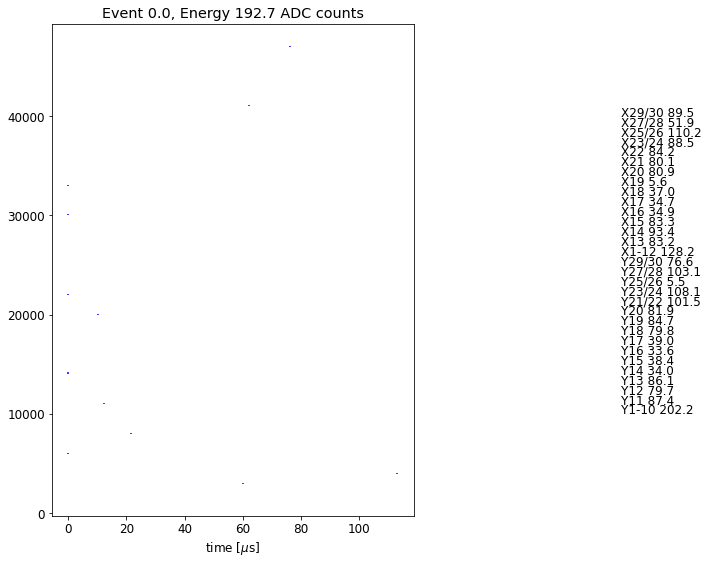

In [9]:
event = Waveform.Event(fname,'/dybfs2/nEXO/fuys/stanford_teststand/data/30th/20200912_MorningNoise_PreRecirculation/raw_data',cut_index[0],run_parameters_file,calibrations_file,channel_map_file)
#the second parameter in the Event class is the location of the tier1 file, which is where the low level information
#are stored, such as the waveform. Make sure the dataset (in this case 20200213_AfterRnInjection matches with the one
#opened in the reduced_added.h5 file), the third parameter is the number of the event you want to see the waveform of

smoothing_windows_us = 0.05
#event.smooth(smoothing_windows_us)
plot = event.plot_event(risetime=True,FFT=True)
plot.show()
